In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('2008_swing_states.csv')
df.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [3]:
# seaborn 스타일은 default 
sns.set()

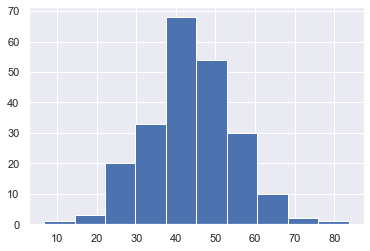

In [4]:
_ = plt.hist(df['dem_share'])

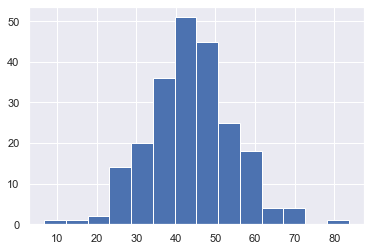

In [5]:
n_data = len(set(df['dem_share']))
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
_ = plt.hist(df['dem_share'] , bins = n_bins)
plt.show()

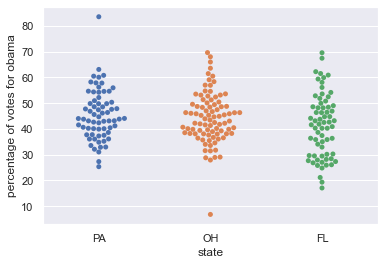

In [6]:
# Binning bias  - 두가지 다른 bin 선택에 따라 플롯 해석을 다르게 하는 것 
# 히스토그램의 문제를 보완하기 위해 Bee swarm plot 사용 
# y축은 정량적 정보 , x 축에 데이터가 분산되어 있지만 x축에 따른 정확한 위치는 중요치 않다.

_ = sns.swarmplot(x='state', y='dem_share', data=df)
_ = plt.xlabel('state')
_ = plt.ylabel('percentage of votes for obama')
plt.show()

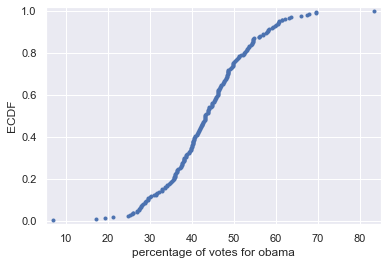

In [7]:
# Bee swarmplot 은 모든 점을 맞추는 데 데이터가 겹쳐서 표현되는 문제점이 있다.
# 위의 경우 ECDF (Empirical cumulative distribution function) 경험적 누적분포 사용

x =  np.sort(df['dem_share']) # X축 정렬 
y = np.arange(1, len(x) + 1 ) / len(x)  # Y축은 최대 1개의 균일한 간격의 데이터 포인트 

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.ylabel('ECDF')
_ = plt.xlabel('percentage of votes for obama')
plt.margins(0.02) #keeps data off plot edges
plt.show()

In [8]:
# ECDF 생성 함수 
def ecdf(data):
   
    # Number of data points: n
    n=len(data)
    # x-data for the ECDF: x
    x=np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n
    return x, y

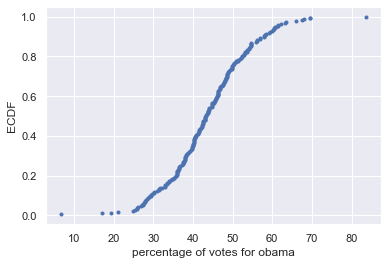

In [9]:
# 함수 사용 
x ,y = ecdf(df['dem_share'])
plt.plot(x , y , marker = '.' ,linestyle = 'none')
plt.ylabel('ECDF')
plt.xlabel('percentage of votes for obama')
plt.show()

### the sample mean and median 

In [10]:
# 평균은 이상치에 영향을 많이 받는다. 
# 이상치란 값이 나머지 대부분의 데이터보다 휠씬 크거나 작은 데이터 
np.mean(df)

total_votes    90424.513514
dem_votes      47214.283784
rep_votes      42236.567568
dem_share         43.764414
dtype: float64

In [11]:
# 중앙값은 데이터셋의 중간 값으로 이상치에 영향을 덜 받는다.
# 정렬된 데이터의 순위에 파생되는 것이 아니라 순위에서 파생 
np.median(df['dem_share'])

43.185

### Percentiles, outliers, and box plots

In [12]:
percentiles = np.percentile(df['dem_share'], [25 ,50 ,75, 95])
percentiles

array([37.3025, 43.185 , 49.925 , 60.8955])

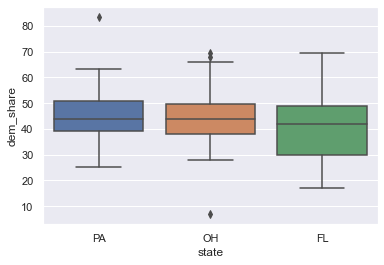

In [13]:
sns.boxplot(df['state'] , df['dem_share'])
plt.show()

### Variance and standard deviation

In [14]:
# 분산은 평균에서 거리를 제곱한 다음 이 모든 값의 평균
# 분산으로부터 분포가 얼마나 퍼져있는 파악 
np.var(df['dem_share'])

114.24649492735986

In [15]:
# 표준편차 분산의 제곱근
# 데이터의 일반적인 확산에 대한 합리적인 판단 지표
np.std(df['dem_share'])

10.68861520157592

In [16]:
np.sqrt(np.var(df['dem_share']))

10.68861520157592

### Covariance and the Pearson correlation coefficient

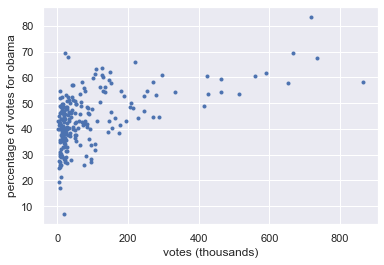

In [17]:
#scatter plot
plt.plot(df['total_votes']/1000, df['dem_share'], marker='.', linestyle='none')
plt.xlabel('votes (thousands)')
plt.ylabel('percentage of votes for obama')
plt.show()

In [18]:
# 2개의 확률변수의 선형 관계를 나타내는 값이다. 만약 2개의 변수중 하나의 값이 상승하는 경향을 보일 때 다른 값도 상승하는 선형 상관성이 있다면 양수의 공분산을 가진다.
# 각 확률변수들이 어떻게 퍼져있는지 파악 
# x의 편차와  y의 편차를 곱한것의 평균 

# x 및 y의 표준편차로 공분산을 나눈 것이 person correlation 데이터의 변동성을 비교한것 
# independant variability / variability due to codependence
# 무차원이며 -1 ~ 1 의 값을 갖는다. 


covariance_matrix = np.cov(df['total_votes'], df['dem_votes'])
np.round(covariance_matrix,0)

array([[2.02451039e+10, 1.24375502e+10],
       [1.24375502e+10, 7.90553527e+09]])

In [19]:
def person_r (x, y) :
    
    corr_mat = np.corrcoef(x , y)
    return corr_mat[0,1]
r = person_r (df['total_votes'] ,df['dem_votes'])
r

0.9831260443086195